In [8]:
import numpy as np
import pylab as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import clone
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, learning_curve

from sklearn.datasets import load_iris

%matplotlib inline

#!git clone https://github.com/Abudo-S/GenericML.git

The operation X = (X - mean) / std is a common data preprocessing technique called standardization or Z-score normalization. Here's why it's performed:

* To Bring Features to a Similar Scale:

  Machine learning algorithms are often sensitive to the scale of the input features. Features with larger values can dominate the learning process compared to features with smaller values.   

  Standardization transforms each feature to have a mean of approximately 0 and a standard deviation of approximately 1. This puts all features on a comparable scale, preventing features with larger ranges from unduly influencing the model.

* Consider these indicators that suggest a need for standardization:

  * Large differences in the range of your features: If the ratio of the maximum to the minimum value (or the difference between them) varies greatly across features.   

  * The algorithm you are using is known to be sensitive to feature scale.
  * You observe unstable training or poor performance with scale-sensitive algorithms.
  * You want to ensure all features contribute equally to the model.
  
It's often a good idea to experiment with and without standardization when using scale-sensitive algorithms. Cross-validation can help you assess whether standardization improves your model's performance on your specific dataset.

Before standarization:[[5.7 4.5]
 [5.6 3.6]
 [5.1 1.5]
 [5.8 5.1]
 [6.8 5.5]
 [5.5 1.4]
 [7.7 6.1]
 [6.3 4.9]
 [5.1 1.6]
 [5.5 4.4]]
After standarization:[[-0.17367395  0.42173371]
 [-0.29484182 -0.08980313]
 [-0.90068117 -1.2833891 ]
 [-0.05250608  0.76275827]
 [ 1.15917263  0.99010798]
 [-0.41600969 -1.34022653]
 [ 2.24968346  1.33113254]
 [ 0.55333328  0.64908342]
 [-0.90068117 -1.22655167]
 [-0.41600969  0.36489628]]


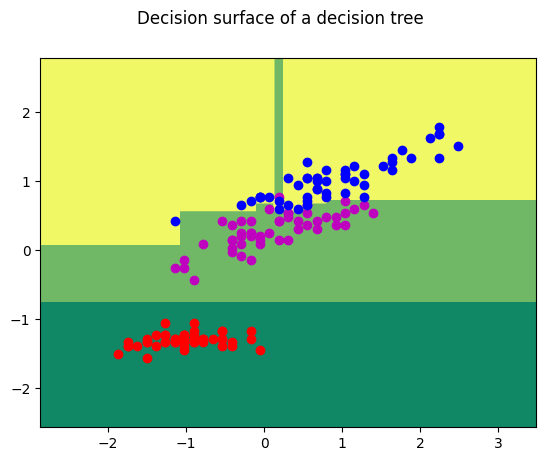

In [9]:
# Parameters
n_classes = 3
plot_colors = "rmb"
plot_step = 0.005
#pl.set_cmap(pl.cm.Paired)
pl.set_cmap(pl.cm.summer)

# Load data
iris = load_iris()

model = DecisionTreeClassifier()
# We only take the two corresponding features
X = iris.data[:, [0,2]]
y = iris.target

# Shuffle
idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# Standardize
mean = X.mean(axis=0)
std = X.std(axis=0)

print(f'Before standarization:{X[:10]}')

X = (X - mean) / std

print(f'After standarization:{X[:10]}')

# Train
clf = clone(model)
clf = model.fit(X, y)

# Plot the decision boundary
pl.plot()

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = pl.contourf(xx, yy, Z)

#pl.xlabel("%s / %s" % (iris.feature_names[pair[0]],
#                       model.__class__.__name__))
#pl.ylabel(iris.feature_names[pair[1]])
pl.axis("tight")

# Plot the training points
for i, c in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    pl.scatter(X[idx, 0], X[idx, 1], c=c, label=iris.target_names[i])

pl.axis("tight")

pl.suptitle("Decision surface of a decision tree")
pl.show()

### Forest Cover Type Dataset
This dataset includes information on trees. More specifically, the type (which is the label to predict), shadow coverage, distance to nearby landmarks (e.g., roads), soil type, and local topography. There are 7 classes of tree types, 55 features, and a total of 15120 data points.

In [10]:
forest = pd.read_csv('/content/GenericML/MSA-main/Datasets/forest-cover-type.csv')
forest.shape

(15120, 56)

In [11]:
forest.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


We then create two `ndarrays` $X$ and $y$ containing data points and labels.

In [9]:
X = forest.drop(columns=['Id', 'Cover_Type']).values
y = forest['Cover_Type'].values

In [10]:
np.unique(y, return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7]),
 array([2160, 2160, 2160, 2160, 2160, 2160, 2160]))

The class distribution is perfectly balanced.

We also create a train-test split with proportions $2/3-1/3$.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Next, we evaluate a tree classifier algorithm on this split.

In [12]:
learner = DecisionTreeClassifier(criterion='gini') #the criterion can be either the gini function or the information gain

learner.fit(X_train, y_train)
y_pred = learner.predict(X_test)
test_score = accuracy_score(y_test,y_pred)
np.round(test_score, decimals=2)

np.float64(0.79)

The resulting tree classifier is quite large and deep.

In [13]:
int(learner.tree_.node_count), int(learner.tree_.max_depth)

(3535, 31)

We compute the CV estimate of the risk.

In [14]:
scores = cross_val_score(learner, X, y, cv=5)
np.round(scores.mean(), decimals=2)

np.float64(0.7)

Now we look at the learning curve from 1K to 9K examples.

In [15]:
sizes = range(1000, 10001, 2000)
train_size, train_score, val_score = learning_curve(learner, X, y, train_sizes=sizes, cv=3)

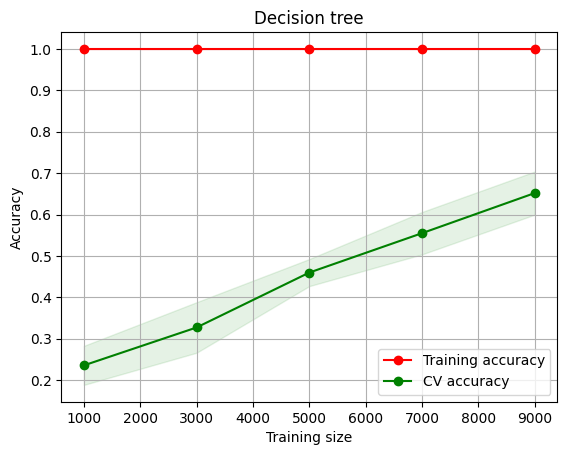

In [16]:
plt.title('Decision tree')
train_score_mean = np.mean(train_score, axis=1)
train_score_std = np.std(train_score, axis=1)
val_score_mean = np.mean(val_score, axis=1)
val_score_std = np.std(val_score, axis=1)
plt.grid()
plt.fill_between(train_size, train_score_mean - train_score_std,
                 train_score_mean + train_score_std, alpha=0.1,
                 color="r")
plt.fill_between(train_size, val_score_mean - val_score_std,
                 val_score_mean + val_score_std, alpha=0.1, color="g")
plt.plot(train_size, train_score_mean, 'o-', color="r",
         label="Training accuracy")
plt.plot(train_size, val_score_mean, 'o-', color="g",
         label="CV accuracy")
plt.legend()
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.show()

Zero training error indicates that the algorithm has no bias, while the large difference between training and test performance reveals a high variance. The final cross-validated performance is only $66\%$.

In [17]:
list(np.round(np.mean(val_score, 1), decimals=2))

[np.float64(0.24),
 np.float64(0.33),
 np.float64(0.46),
 np.float64(0.55),
 np.float64(0.65)]

Let's see what happens when we constrain the depth of the tree.

In [18]:
depths = np.arange(1,33,5)
learner = DecisionTreeClassifier()
train_score, val_score = validation_curve(learner, X, y, param_name='max_depth', param_range=depths, cv=3)

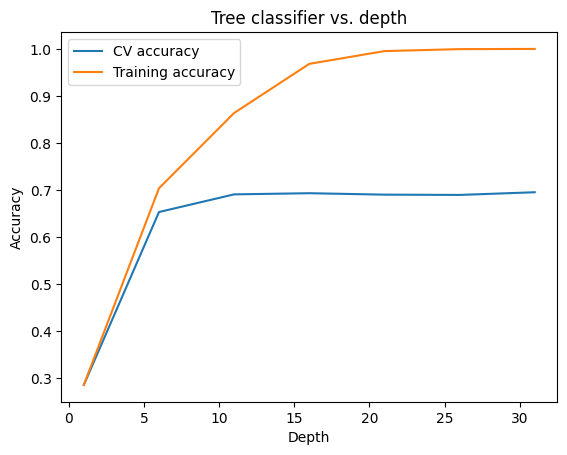

In [20]:
plt.title('Tree classifier vs. depth')
plt.plot(depths, np.mean(val_score, 1), label='CV accuracy')
plt.plot(depths, np.mean(train_score, 1), label='Training accuracy')
plt.legend()
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

Below depth 5 the tree underfits. Then overfitting starts. However, the CV estimate of the accuracy does not get any worse.

### MNIST dataset
Handwritten numerals. The original dataset is already split in training (60K) and test (10K) sets. For efficiency reasons, we only work with the test set, which we further split in training and test.

Each row of the data matrix consists of 785 values: the first value is the label (a number from 0 to 9) and the remaining 784 values are the pixel values (a number from 0 to 255).

In [21]:
mnist = pd.read_csv("/content/GenericML/MSA-main/Datasets/MNIST/mnist_test.csv")
mnist.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
mnist.shape

(10000, 785)

We create the data matrix, the list of labels, and a train/test split with proportions $4/5-1/5$.

In [17]:
mnist_X = mnist.drop("label",axis=1)
mnist_y = mnist["label"]
X = mnist_X.values
y = mnist_y.values

print(mnist_X)

      1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  ...  28x19  28x20  \
0       0    0    0    0    0    0    0    0    0     0  ...      0      0   
1       0    0    0    0    0    0    0    0    0     0  ...      0      0   
2       0    0    0    0    0    0    0    0    0     0  ...      0      0   
3       0    0    0    0    0    0    0    0    0     0  ...      0      0   
4       0    0    0    0    0    0    0    0    0     0  ...      0      0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...    ...    ...   
9995    0    0    0    0    0    0    0    0    0     0  ...      0      0   
9996    0    0    0    0    0    0    0    0    0     0  ...      0      0   
9997    0    0    0    0    0    0    0    0    0     0  ...      0      0   
9998    0    0    0    0    0    0    0    0    0     0  ...      0      0   
9999    0    0    0    0    0    0    0    0    0     0  ...      0      0   

      28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  


In [18]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In this case, it is instructive to visualize the original images from the list of pixels.

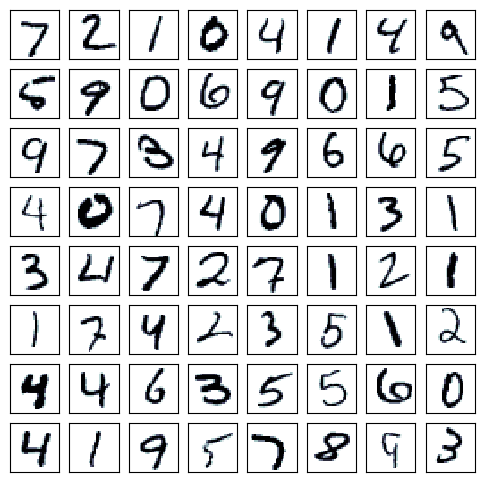

In [20]:
plt.figure(figsize=(6,6))
for digit_num in range(0,64):
    plt.subplot(8,8,digit_num+1)
    grid_data = mnist_X.iloc[digit_num].values.reshape(28,28)
    plt.imshow(grid_data, interpolation = "none", cmap = "bone_r")
    plt.xticks([])
    plt.yticks([])

We start by checking the performance of the standard tree classifier algorithm.

In [22]:
tree_lrn = DecisionTreeClassifier(criterion='gini')

tree_lrn.fit(X_train, y_train)
y_pred = tree_lrn.predict(X_test)
test_score = accuracy_score(y_test,y_pred)
np.round(test_score, decimals=2)

np.float64(0.8)

In [23]:
int(tree_lrn.tree_.node_count), int(tree_lrn.tree_.max_depth)

(1611, 21)

The analysis of the learning curve for the tree classifier algorithm shows essentially no bias and a large variance (see below).

In [24]:
sizes = range(1000, 6666, 1000)
train_size, train_score, val_score = learning_curve(tree_lrn, X, y, train_sizes=sizes, cv=3)

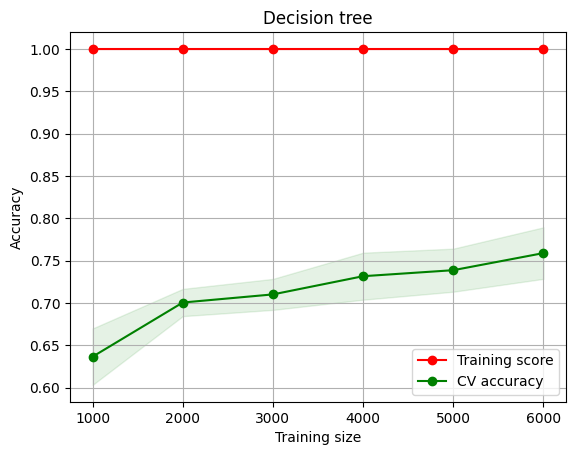

In [25]:
plt.title('Decision tree')
train_score_mean = np.mean(train_score, axis=1)
train_score_std = np.std(train_score, axis=1)
val_score_mean = np.mean(val_score, axis=1)
val_score_std = np.std(val_score, axis=1)
plt.grid()
plt.fill_between(train_size, train_score_mean - train_score_std,
                 train_score_mean + train_score_std, alpha=0.1,
                 color="r")
plt.fill_between(train_size, val_score_mean - val_score_std,
                 val_score_mean + val_score_std, alpha=0.1, color="g")
plt.plot(train_size, train_score_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_size, val_score_mean, 'o-', color="g",
         label="CV accuracy")
plt.legend()
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
depths = np.arange(1,21,5)
tree_lrn = DecisionTreeClassifier(criterion='gini')
train_score, val_score = validation_curve(tree_lrn, X, y, param_name='max_depth', param_range=depths, cv=3)

In [ ]:
plt.title('Tree classifier vs. depth')
plt.plot(depths, np.mean(val_score, 1), label='CV accuracy')
plt.plot(depths, np.mean(train_score, 1), label='Training accuracy')
plt.legend()
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()



learning_curve()

  Purpose: Evaluates how the amount of training data affects the model's performance.
  X-axis: Represents different sizes of the training dataset (e.g., increasing number of training samples).
  What it shows: Plots the training and validation scores as you train your model on progressively larger subsets of the training data.
  Goal: Helps you understand if: Your model would benefit from more training data (if the validation score is still improving). Your model is suffering from high bias (underfitting) - indicated by low training and validation scores that converge at a low value. Your model is suffering from high variance (overfitting) - indicated by a significant gap between the high training score and a lower validation score.'

Use case: Diagnosing bias-variance issues and determining if gathering more data is likely to improve model performance.

validation_curve()

  Purpose: Evaluates the impact of a single hyperparameter on the model's performance. (acts like k-cross validation)
  X-axis: Represents different values of the chosen hyperparameter. What it shows: Plots the training and validation scores for various settings of that specific hyperparameter.
  Goal: Helps you identify the optimal range of values for that hyperparameter to avoid underfitting (low scores for both training and validation) or overfitting (high training score but low validation score). You're looking for the hyperparameter value that maximizes the validation score.

Use case: Tuning hyperparameters of your model (e.g., n_neighbors in KNN, C in SVM, max_depth in decision trees).
